Ch2. 신경망의 수학적 구성 요소
--------

### 2.1 신경망과의 첫 만남

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K

%matplotlib inline

Using TensorFlow backend.


In [2]:
# load mnist data from keras

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

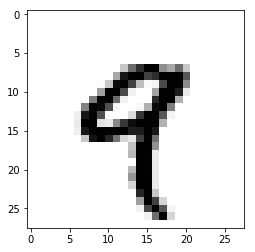

In [5]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**activation 설정시**
- activation 값을 설정 할 때 마지막 layer에서 softmax로 했더니 에러가 남
- 해결책
  - https://keras.io/activations/
  - https://github.com/keras-team/keras/issues/9621#issuecomment-394664543
- 또는 tensorflow에서 바로 가져와도 된다.

```python
from keras import backend as K
model.add(Dense(64, activation=K.tanh))

from keras import backend as K
model.add(Lambda(lambda x: K.tf.nn.softmax(x)))
```

In [6]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation=tf.nn.softmax))

신경망의 핵심 구성 요소는 일종의 데이터 처리 필터라고 할 수 있는 layer(층)이다.
- 어떤 데이터가 들어가면 더 유용한 형태로 출력됨
- 그 다음 더 의미가 있는 representation을 입력된 데이터로부터 출력함


위의 예제에서는 fully connected된(완전 연결) 신경망 층인 Dense 층 2개가 속함
- 마지막 층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1입니다)을 반환하는 소프트맥스 층입니다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률입니다.

In [7]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 세 가지가 더 필요합니다:

- loss function(손실 함수) : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와 줍니다.
- optimizer(옵티마이저): 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘입니다.
- metrics(훈련과 테스트 과정을 모니터링할 지표) : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려하겠습니다.

In [8]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정합니다. 
- 예를 들어, 앞서 우리의 훈련 이미지는 [0, 255] 사이의 값인 uint8 타입의 (60000, 28, 28) 크기를 가진 배열로 저장되어 있습니다.
- 이 데이터를 0과 1 사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 크기의 배열로 바꿉니다.

In [9]:
# 레이블을 범주형으로 인코딩

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2559 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.1021 - acc: 0.9702
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0678 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.0495 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0372 - acc: 0.9891


In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 45us/step
test_acc: 0.97


### 2.2 신경망을 위한 데이터 표현

모든 머신 러닝 시스템은 일반적으로 텐서를 기본 데이터 구조로 사용

**텐서는 무엇일까?**
- 데이터를 위한 컨테이너 개념
- 거의 항상 수치형 데이터를 다룸
- 텐서는 임의의 차원 개수를 가지는 행렬의 일반화된 모습
- 텐서에서는 dimension을 종종 축(axis)라고 부르기도 함

텐서에 대한 아주 좋은 설명
- https://www.youtube.com/watch?v=m0qwxNA7IzI
- 허민석 님 짱!

#### 2.2.1 스칼라(0D 텐서)

하나의 숫자만 담고 있는 텐서를 스칼라(scalar)라고 부름
- numpy에서는 float32, float64 타입의 숫자가 스칼라 텐서임
- ndim 속성을 사용하면 넘파이 배열의 축 개수를 확인 할 수 있음
- 스칼라 텐서의 축 개수는 0이다(ndim==0).


In [12]:
x = np.array(12)
print(x)
print(x.ndim)

12
0


#### 2.2.2 벡터(1D 텐서)

숫자의 배열을 벡터(vector) 또는 1D 텐서라고 부름
- 딱 하나의 축을 가짐

In [14]:
x = np.array([12, 3, 6, 14, 7])
print(x)
print(x.ndim)

[12  3  6 14  7]
1


- 이 벡터는 5개의 원소를 가지고 있으므로 5차원 벡터라고 부름
- 5D 벡터와 5D 텐서를 혼동하면 안 됨
- 5D **벡터**는 하나의 축을 따라 5개의 차원을 가진 것
- 5D **텐서**는 5개의 축을 가진 것
  - 텐서의 각 축을 따라 여러 개의 차원을 가진 벡터가 놓일 수 있다.

- 차원수는(dimensionality)는 특정 축을 따라 놓인 원소의 개수(5d-vector)이거나 텐서의 축 개수(5d-tensor)를 의미하므로 혼동하기 쉬움

In [15]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 37, 2]])

print(x)
print(x.ndim)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 37  2]]
2


- 첫 번째 축에 놓여 있는 원소를 행이라 부른다.
- 두 번째 축에 놓여 있는 원소를 열이라 부른다.
- x의 첫 번째 행은 [5, 78, 2, 34, 0], 첫 번째 열은 [5,6,7] 이다

#### 2.2.4 3D 텐서와 고차원 텐서

In [16]:
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 37, 2]],
             [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 37, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 37, 2]]
             ])

In [18]:
print(x)
print(x.ndim)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 37  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 37  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 37  2]]]
3


#### 2.2.5 핵심 속성
텐서는 3개의 핵심 속성으로 정의한다.

- **축의 개수(랭크)**
  - 예를 들어 3D 텐서에는 3개의 축이 있고, 행렬에는 2개의 축이 있다.
  - numpy의 ndim으로 확인 가능
- **크기(shape)**
  - 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 tuple
  - 예를 들어 앞에 나온 행렬의 크기는 (3,5)이고 3D 텐서의 크기는 (3,3,5)이다.
  - 벡터의 크기는 (5,) 처럼 1개의 원소로 이루어진 튜플
  - 배열 스칼라는 ()처럼 크기가 없다.
- **데이터 타입**
  - 텐서에 포함된 데이터의 타입
  - 예를 들면 텐서의 타입은 float32, float64, uint8 등이 될 수 있다.
  - 텐서는 사전에 할당되어 연속된 메모리에 저장되어야 하므로 numpy 배열은 가변 문자열을 지원하지 않음

In [20]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
print(train_images.ndim)

3


In [22]:
print(train_images.shape)

(60000, 28, 28)


In [23]:
# 8비트 정수형 3D 텐서
# 좀 더 정확하게는 28 * 28 크기의 정수 행렬 6만 개가 있는 배열
# 각 행렬은 하나의 흑백 이미지, 각 원소는 0에서 255 사이의 값을 가짐

print(train_images.dtype)

uint8


In [25]:
# train_images.dtype?

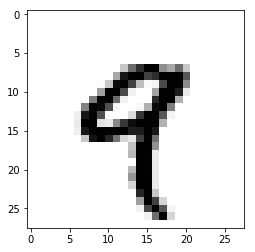

In [26]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### 2.2.6 numpy로 텐서 조작하기

In [28]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [29]:
train_images[10:100, :, :].shape

(90, 28, 28)

In [30]:
train_images[10:100, 0:28, 0:28].shape

(90, 28, 28)

#### 2.2.7 배치 데이터

일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축은 샘플 축(sample axis)이다.
- 딥러닝 모델은 한 번에 전체 데이터셋을 처리 하지 않음
- 그 대신 데이터를 작은 배치(batch)로 나눔
- 구체적으로 MNIST 숫자 데이터에서 크기가 128인 배치 하나는 다음과 같다.

In [33]:
batch_one = train_images[:128]

In [34]:
batch_one.shape

(128, 28, 28)

In [35]:
batch_two = train_images[128:256]

batch_n = train_images[128 * n : 128(n * 1)]

- 이런 배치 데이터를 다룰 때는 첫 번째 축을 배치 축 또는 배치 차원이라고 함

#### 2.2.8 텐서의 실제 사례
- 벡터 데이터 : (samples, features), 2D
- 시계열 데이터, sequence 데이터 : (samples, timesteps ,features), 3D
- 이미지 데이터 : (samples, height, width, channels), (samples, channels, height, width), 4D
- 동영상 데이터 : (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width), 5D

#### 2.2.9 벡터 데이터 ~ 2.2.12 비디오 데이터
- 자세한 내용은 책 참조


흑백 이지미의 경우 컬러 채널의 차원 크기는 1
- 256 * 256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1)

이미지 텐서 크기를 지정하는 방법은 두 가지
- channel_last
  - 텐서플로우에서 사용
- channel_first
  - 씨애노에서 사용
- keras는 둘 다 지원

### 2.3 신경망의 톱니바퀴 : 텐서 연산

```python
keras.layers.Dense(512, activation='relu')
```

```bash
output = relu(dot(W, input) + b)
```

- 정리하면 3개의 텐서 연산이 위 수식에 있다.
- 입력 텐서와 텐서 W 사이이 dot product
- 그 결과를 b와 덧셈
- 마지막으로 relu 연산 ( relu(x) 는 max(x, 0)임 )

#### 2.3.1 원소별 연산
- relu 함수와 덧셈은 원소별 연산. 자세한 코든느 책 잠조